In [1]:
import os

file_path = "/content/traffic.csv"

if os.path.exists(file_path):
    print("✅ تم رفع الملف بنجاح!")
else:
    print("❌ لم يتم العثور على الملف، تأكد من رفعه.")


✅ تم رفع الملف بنجاح!


In [2]:
import pandas as pd

# تحميل البيانات
file_path = "/content/traffic.csv"
df = pd.read_csv(file_path)

# عرض أول 5 صفوف لفحص البيانات
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [4]:
df.describe()


,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


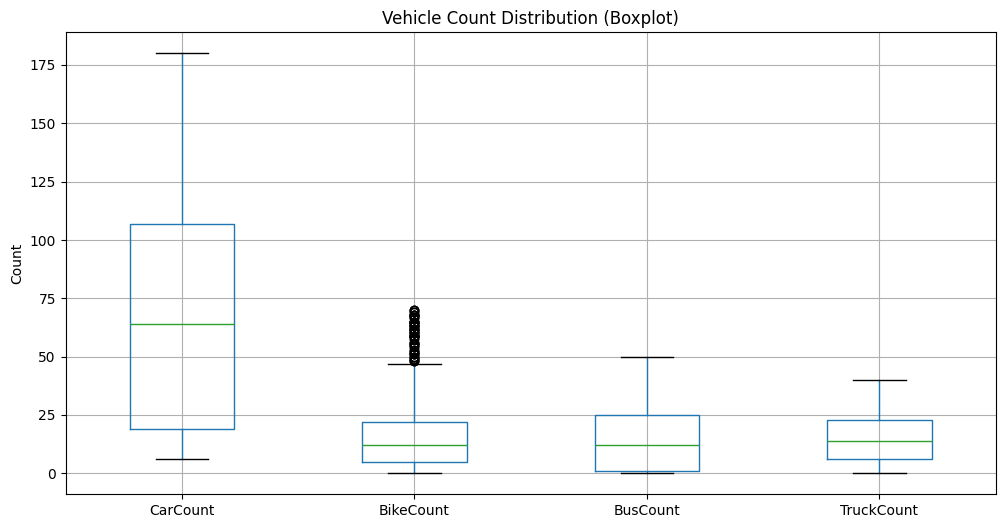

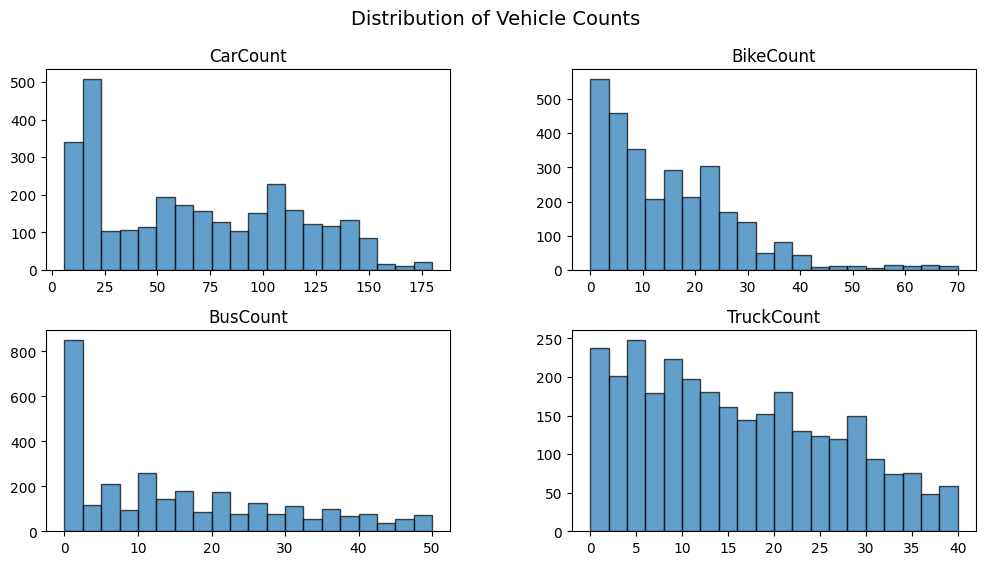

In [11]:
# رسم Boxplot لتوزيع عدد المركبات
plt.figure(figsize=(12, 6))
df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].boxplot()
plt.title('Vehicle Count Distribution (Boxplot)')
plt.ylabel('Count')
plt.show()

# رسم Histogram لتوزيع عدد المركبات
df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].hist(bins=20, alpha=0.7, figsize=(12, 6), edgecolor='black', grid=False)
plt.suptitle('Distribution of Vehicle Counts', fontsize=14)
plt.show()

<ipython-input-12-b3e08f7be620>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Traffic Situation"], palette="viridis")


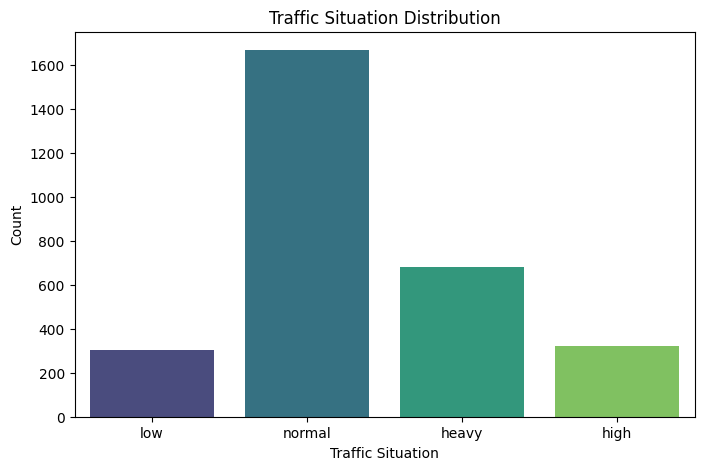

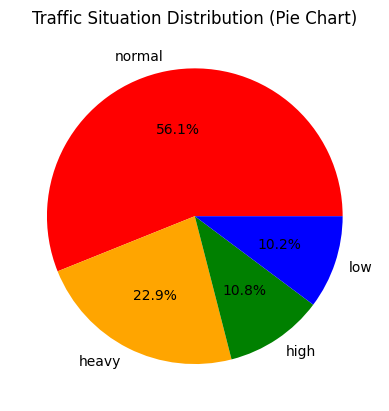

In [12]:
# رسم Bar Chart لتوزيع حالات المرور
plt.figure(figsize=(8,5))
sns.countplot(x=df["Traffic Situation"], palette="viridis")
plt.title("Traffic Situation Distribution")
plt.xlabel("Traffic Situation")
plt.ylabel("Count")
plt.show()

# رسم Pie Chart لتوزيع حالات المرور
df["Traffic Situation"].value_counts().plot.pie(autopct="%1.1f%%", colors=['red', 'orange', 'green', 'blue'])
plt.title("Traffic Situation Distribution (Pie Chart)")
plt.ylabel("")  # إخفاء التسمية الجانبية
plt.show()

<ipython-input-13-8004a0a88aa5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Day of the week", y="Total", data=df, palette="coolwarm")


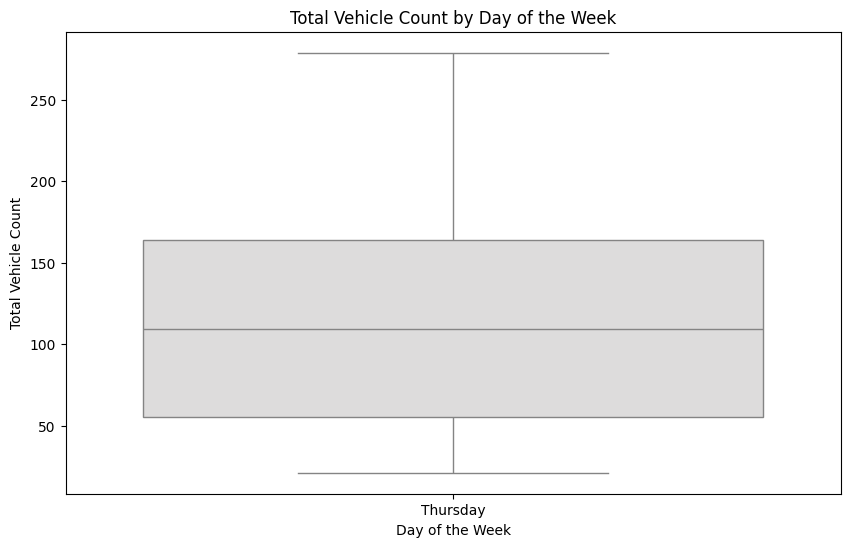

In [13]:
# استخراج اليوم من العمود "Time"
df['Day of the week'] = pd.to_datetime(df['Date']).dt.day_name()

# رسم Boxplot لعدد المركبات حسب يوم الأسبوع
plt.figure(figsize=(10, 6))
sns.boxplot(x="Day of the week", y="Total", data=df, palette="coolwarm")
plt.title("Total Vehicle Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Vehicle Count")
plt.show()

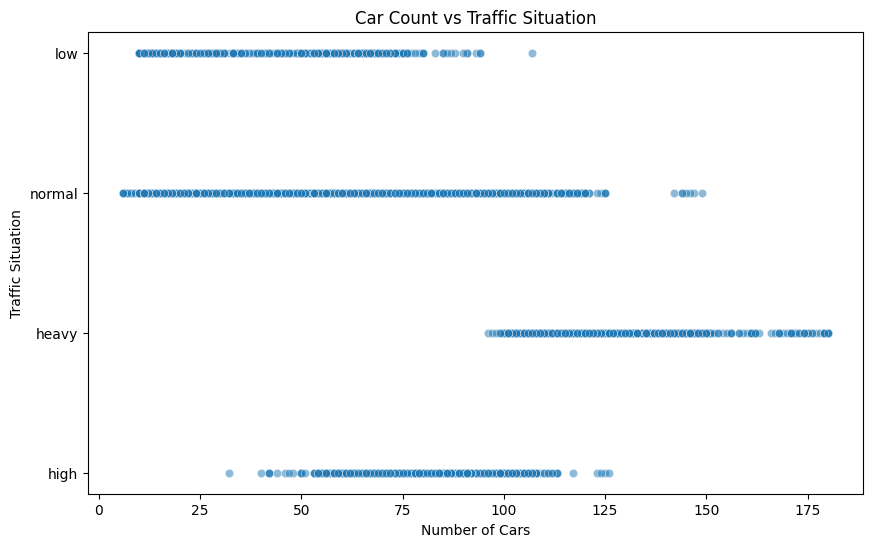

In [14]:
# رسم Scatter Plot لتحليل العلاقة بين عدد السيارات وحالة المرور
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["CarCount"], y=df["Traffic Situation"], alpha=0.5)
plt.title("Car Count vs Traffic Situation")
plt.xlabel("Number of Cars")
plt.ylabel("Traffic Situation")
plt.show()

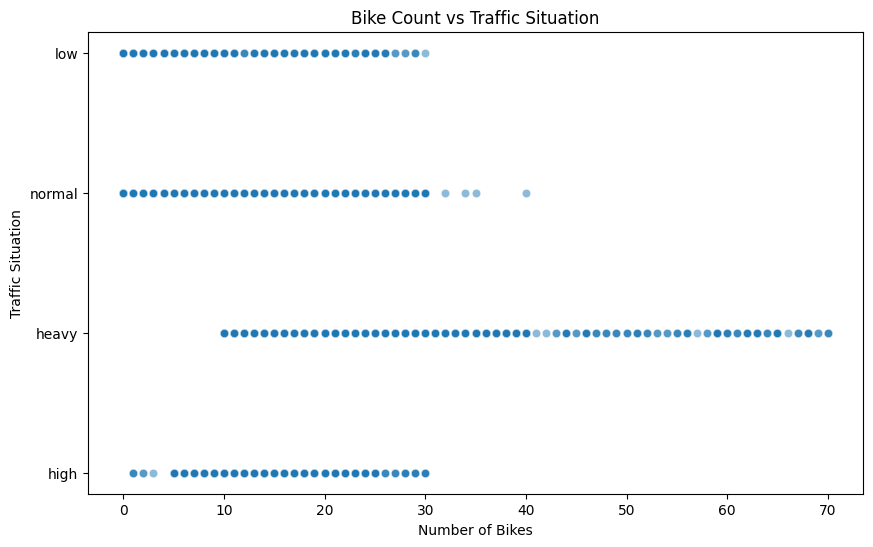

In [15]:
# رسم Scatter Plot لتحليل العلاقة بين عدد الدراجات وحالة المرور
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["BikeCount"], y=df["Traffic Situation"], alpha=0.5)
plt.title("Bike Count vs Traffic Situation")
plt.xlabel("Number of Bikes")
plt.ylabel("Traffic Situation")
plt.show()

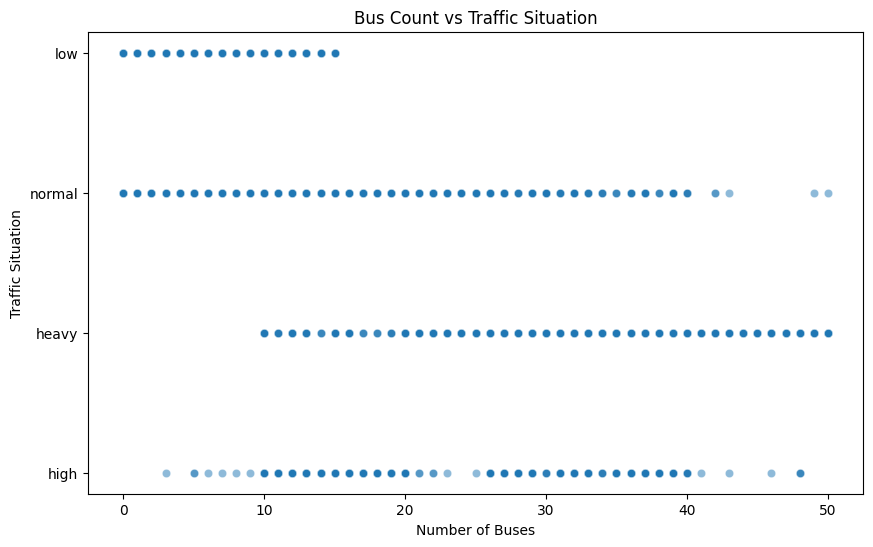

In [16]:
# رسم Scatter Plot لتحليل العلاقة بين عدد الحافلات وحالة المرور
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["BusCount"], y=df["Traffic Situation"], alpha=0.5)
plt.title("Bus Count vs Traffic Situation")
plt.xlabel("Number of Buses")
plt.ylabel("Traffic Situation")
plt.show()

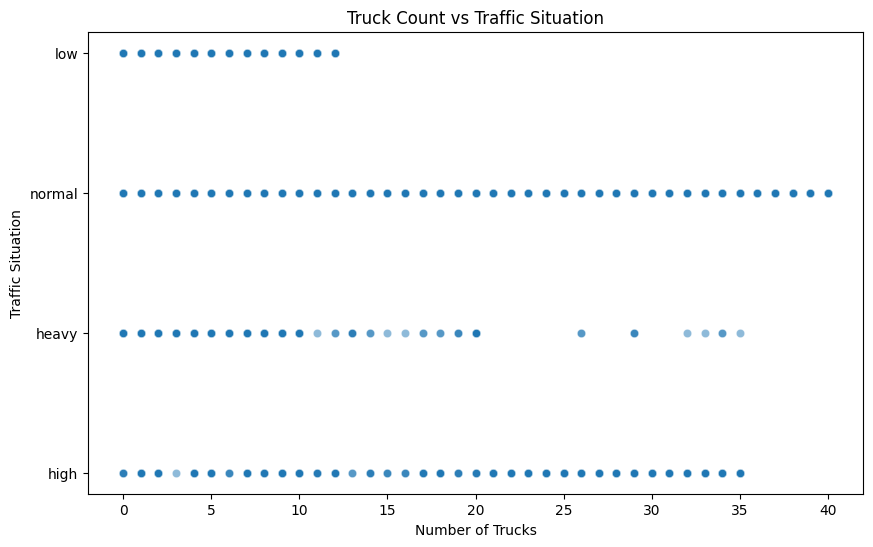

In [17]:
# رسم Scatter Plot لتحليل العلاقة بين عدد الشاحنات وحالة المرور
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["TruckCount"], y=df["Traffic Situation"], alpha=0.5)
plt.title("Truck Count vs Traffic Situation")
plt.xlabel("Number of Trucks")
plt.ylabel("Traffic Situation")
plt.show()

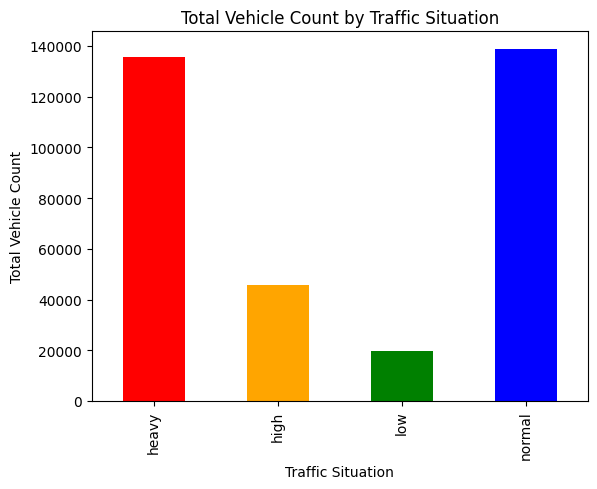

In [18]:
# حساب إجمالي عدد المركبات لكل حالة مرورية
total_by_traffic = df.groupby('Traffic Situation')['Total'].sum()

# رسم Bar Chart لتحليل إجمالي عدد المركبات حسب حالة المرور
total_by_traffic.plot(kind='bar', color=['red', 'orange', 'green', 'blue'])
plt.title("Total Vehicle Count by Traffic Situation")
plt.ylabel("Total Vehicle Count")
plt.xlabel("Traffic Situation")
plt.show()

<ipython-input-19-b8206471f7e9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


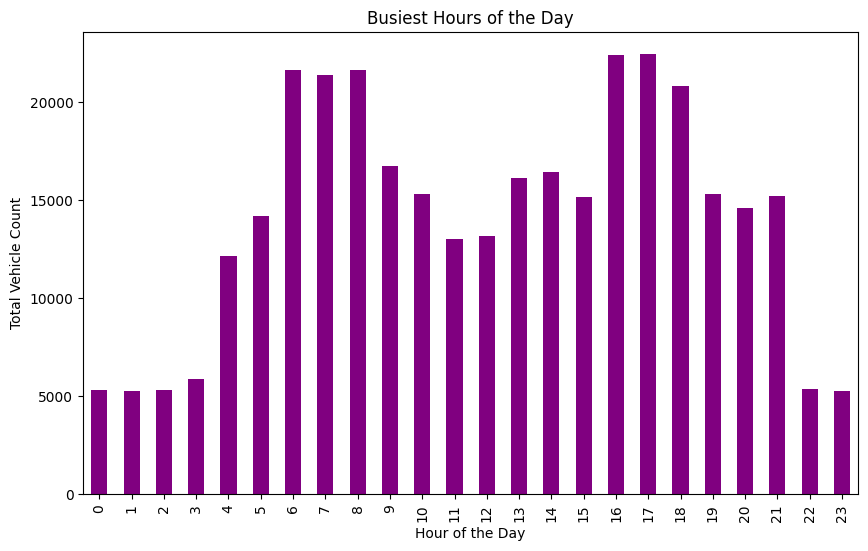

In [19]:
# استخراج الساعة من العمود "Time"
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# حساب إجمالي المركبات حسب الساعة
total_by_hour = df.groupby('Hour')['Total'].sum()

# رسم Bar Chart لأكثر الساعات ازدحامًا
total_by_hour.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Busiest Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Vehicle Count")
plt.show()